# Handwritten Digit Recognition

## Step 1: Define the Problem & Collect Data

**Q**: What are you trying to predict?<br/>
**A**: Classify images of handwritten digits into their 10 categories (0 to 9).


**Q**: What will your input data be?<br/>
**A**: Grayscale images of handwritten digits (28x28 pixels).


**Q**: What type of problem are you facing?<br/>
**A**: Binary classification


**Q**: What is the size of your dataset?<br/>
**A**: There are 60,000 training samples and 10,000 test samples.

In [2]:
!pip install keras

In [3]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


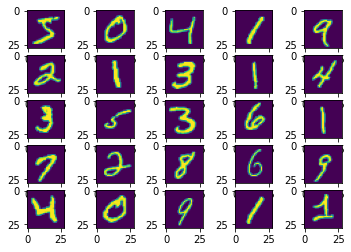

In [5]:
import matplotlib.pyplot as plt

grid_size = 5
f, axarr = plt.subplots(grid_size, grid_size)
for i in range(grid_size):
    for j in range(grid_size):
        axarr[i, j].imshow(train_images[i * grid_size + j])

## Step 2: Pick Success Metrics

**Q**: What is your metric for success?<br/>
**A**: Accuracy

**Q**: What value of your success metric are you aiming for?<br/>
**A**: 90%

## Step 3: Pick an Evaluation Protocol and Prepare Your Data

**Q**: What approach are going to follow for validation?<br/>
**A**: Hold out validation.

**Q**: Does your data require normalization or scaling?<br/>
**A**: Yes, pixel values are in the range \[0,255\] and need to be scaled down to \[0,1\].

**Q**: What is the training/validation/test split?<br/>
**A**: 75-25 training/validation split.
Training:   45,000 samples
Validation: 15,000 samples
Test:       10,000 samples

**Q**: Can/should the data be randomized before splitting?<br/>
**A**: Not required. It's already randomized.

**Q**: Can you come up with new features using existing ones to make the problem easier?<br/>
**A**: Not required.

In [6]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical

partial_train_images = train_images[:45000]
partial_train_labels = train_labels[:45000]

validation_images = train_images[45000:]
validation_labels = train_labels[45000:]

partial_train_labels = to_categorical(partial_train_labels)
validation_labels = to_categorical(validation_labels)
test_labels = to_categorical(test_labels)

## Step 4: Develop the First Model

The first goal is to develop a model that is capable of beating a dumb baseline. There are 3 key choices to be made:
1. Last-layer activation function
2. Loss function
3. Optimization configuration (generally, `rmsprop` is good enough).

<table>
    <tr>
        <th>Problem Type</th>
        <th>Last-layer Activation</th>
        <th>Loss Function</th>
    </tr>
    <tr>
        <td>Binary Classification</td>
        <td>`sigmoid`</td>
        <td>`binary_crossentropy`</td>
    </tr>
    <tr>
        <td>Multi-class, single-label classification</td>
        <td>`softmax`</td>
        <td>`categorical_crossentropy`</td>
    </tr>
    <tr>
        <td>Multi-class, multi-label classification</td>
        <td>`sigmoid`</td>
        <td>`binary_crossentropy`</td>
    </tr>
    <tr>
        <td>Regression to arbitrary values</td>
        <td>None</td>
        <td>`mse`</td>
    </tr>
    <tr>
        <td>Regression to values in `[0,1]`</td>
        <td>`sigmoid`</td>
        <td>`mse` or `binary_crossentropy`</td>
    </tr>
</table>

In [11]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(32, activation='relu', input_shape=(28 * 28, )))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = network.fit(
    partial_train_images, 
    partial_train_labels, 
    epochs=60, 
    batch_size=128, 
    validation_data=(validation_images, validation_labels))

Epoch 1/60
352/352 [==============================] - 1s 3ms/step - loss: 0.5387 - accuracy: 0.8588 - val_loss: 0.3001 - val_accuracy: 0.9156
Epoch 2/60
352/352 [==============================] - 1s 2ms/step - loss: 0.2664 - accuracy: 0.9249 - val_loss: 0.2384 - val_accuracy: 0.9332
Epoch 3/60
352/352 [==============================] - 1s 2ms/step - loss: 0.2152 - accuracy: 0.9391 - val_loss: 0.2102 - val_accuracy: 0.9406
Epoch 4/60
352/352 [==============================] - 1s 2ms/step - loss: 0.1854 - accuracy: 0.9469 - val_loss: 0.1928 - val_accuracy: 0.9444
Epoch 5/60
352/352 [==============================] - 1s 2ms/step - loss: 0.1657 - accuracy: 0.9526 - val_loss: 0.1758 - val_accuracy: 0.9490
Epoch 6/60
352/352 [==============================] - 1s 3ms/step - loss: 0.1497 - accuracy: 0.9576 - val_loss: 0.1652 - val_accuracy: 0.9525
Epoch 7/60
352/352 [==============================] - 1s 2ms/step - loss: 0.1372 - accuracy: 0.9606 - val_loss: 0.1596 - val_accuracy: 0.9559
Epoch 

In [16]:
#history.history

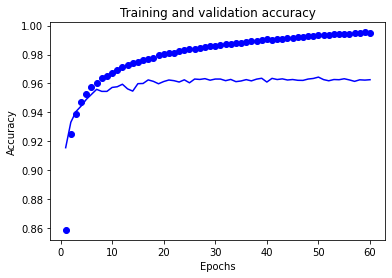

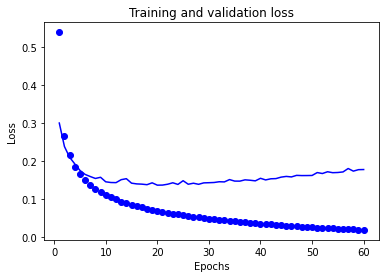

In [18]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.margins(0.05)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.margins(0.05)

plt.show()

## Step 5: Develop a Model That Overfits

The final objective is to find the balance between:
* Optimization and generalization
* Under-fitting and over-fitting
* Under-capacity and over-capacity

To figure out how big a model is required, you must develop a model that overfits, using one or more of the following approaches:
* Add layers
* Makes layers bigger
* Train for more epochs

Plot the values of the loss function and the success metrics on the training and validation datasets to identify where the model starts over-fitting.

In [ ]:
from keras import regularizers

network2 = models.Sequential()
network2.add(layers.Dense(784, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(28 * 28, )))
network2.add(layers.Dense(784, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
network2.add(layers.Dense(784, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
network2.add(layers.Dense(10, activation='softmax'))

network2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = network2.fit(
    partial_train_images, 
    partial_train_labels, 
    epochs=30, 
    batch_size=128, 
    validation_data=(validation_images, validation_labels))

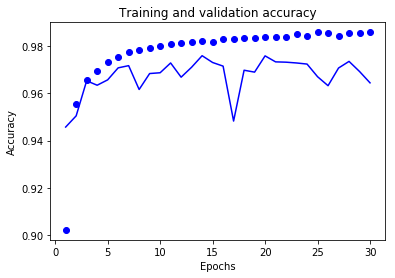

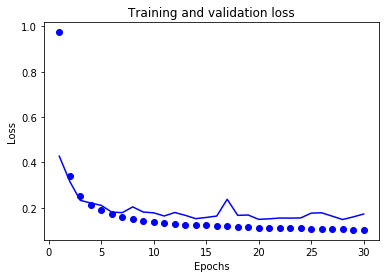

In [ ]:
acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs[0:], acc[0:], 'bo', label='Training acc')
plt.plot(epochs[0:], val_acc[0:], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.margins(0.05)

plt.figure()

plt.plot(epochs[0:], loss[0:], 'bo', label='Training loss')
plt.plot(epochs[0:], val_loss[0:], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.margins(0.05)

plt.show()

## Step 6: Regularize the Model and Tune the Hyperparameters

This part will take the most time. You will repeatedly modify your model, train it, evaluate on your validation data, modify it again... until your model is as good as it can get.

Following are some approaches for improving the model:
* Add dropout
* Try different architectures, add or remove layers
* Add L1 / L2 regularization
* Try different hyperparameters to find the optimal cofiguration, e.g.:
    * No. of units per layer
    * Learning rate of the optimizer
* Iterate on feature engineering: add new features, remove features that do not seem informative

Be mindful of the following: every time you are using feedback from your validation process in order to tune your model, you are leaking information about your validation process into your model. This can cause overfitting on the validation data.

Once you have developed a seemingly good enough model configuration, you can train your final production model on all data available (training and validation) and evaluate it one last time on the test set. Finally, you can save your model to disk, so that it can be reused later.

In [19]:
from keras import regularizers

network2 = models.Sequential()
network2.add(layers.Dense(784, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(28 * 28, )))
network2.add(layers.Dense(784, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(28 * 28, )))
network2.add(layers.Dense(784, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(28 * 28, )))
network2.add(layers.Dense(10, activation='softmax'))

network2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = network2.fit(
    train_images, 
    to_categorical(train_labels), 
    epochs=14, 
    batch_size=128)

Epoch 1/14
469/469 [==============================] - 21s 45ms/step - loss: 0.8246 - accuracy: 0.9140
Epoch 2/14
469/469 [==============================] - 21s 45ms/step - loss: 0.2891 - accuracy: 0.9584
Epoch 3/14
469/469 [==============================] - 21s 45ms/step - loss: 0.2249 - accuracy: 0.9663
Epoch 4/14
469/469 [==============================] - 21s 45ms/step - loss: 0.1928 - accuracy: 0.9705
Epoch 5/14
469/469 [==============================] - 21s 45ms/step - loss: 0.1741 - accuracy: 0.9732
Epoch 6/14
469/469 [==============================] - 21s 45ms/step - loss: 0.1605 - accuracy: 0.9751
Epoch 7/14
469/469 [==============================] - 21s 46ms/step - loss: 0.1525 - accuracy: 0.9764
Epoch 8/14
469/469 [==============================] - 21s 46ms/step - loss: 0.1455 - accuracy: 0.9779
Epoch 9/14
469/469 [==============================] - 21s 45ms/step - loss: 0.1412 - accuracy: 0.9782
Epoch 10/14
469/469 [==============================] - 21s 46ms/step - loss: 0.137

In [20]:
test_loss, test_acc = network2.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 8ms/step - loss: 0.1568 - accuracy: 0.9721


In [23]:
print('Test loss:', test_loss*100)
print('Test acc:', test_acc*100)
#network2.save('../models/00_mnist_basic.h5')

Test loss: 15.680323541164398
Test acc: 97.2100019454956


In [24]:
jovian.commit(project='mnist_hand_wri')

[jovian] Detected Colab notebook...


[jovian] Error: Please provide the project argument e.g. jovian.commit(project='my-project')
